In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')

In [3]:
eid_data.head(5)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
0,1136349,11004,1947,801500,68500,UKM64,774,252000.0,663000.0,UKM34,3106
1,1071275,11004,1952,798500,66500,UKM64,775,211000.0,665000.0,UKM63,2618
2,4778319,11005,1946,798500,66500,UKM64,775,323000.0,669000.0,UKM25,3959
3,2797312,11011,1949,842500,79500,UKM64,892,358000.0,171000.0,UKK11,4375
4,3735126,11002,1948,842500,79500,UKM64,892,459000.0,205000.0,UKJ14,5592


In [3]:
NUTS3_counts = pd.read_csv('../00_csv_files/nuts3_POB_POR_counts.csv').sort_values(by='nuts3')
NUTS1_counts = pd.read_csv('../00_csv_files/nuts1_POB_POR_counts.csv').sort_values(by='nuts1')

In [5]:
NUTS3_counts.head(5)

,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,POBsampled_age,PORsampled_age,POB_log2_sampled_ratio,POR_log2_sampled_ratio
0,UKC11,4673,6056,283640,943.785351,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438,0.036743,0.047618,1.197614,1.665590
1,UKC12,6318,6459,273590,911.140520,121960,0.023100,0.023627,South Teesside,300272015,0.051804,0.052960,1.693196,1.818999
2,UKC13,1475,2023,105565,544.849389,47865,0.013982,0.019164,Darlington,193750791,0.030816,0.042265,0.943808,1.493550
3,UKC14,7223,7167,513240,229.714525,243360,0.014079,0.013964,Durham CC,2234251408,0.029680,0.029450,0.889643,0.972374
4,UKC21,3440,4485,316030,62.873945,159855,0.010888,0.014192,Northumberland,5026406393,0.021520,0.028057,0.425781,0.902441


In [6]:
NUTS1_counts

,nuts1,POBcount,PORcount,census_pops,POB_sampled,POR_sampled,NUTS_NAME
0,UKC,49833,52697,2596890,0.019189,0.020292,North East England
1,UKD,75001,70957,7052175,0.010635,0.010062,North West England
2,UKE,60365,65060,5283730,0.011425,0.012313,Yorkshire and the Humber
3,UKF,32146,37496,4533225,0.007091,0.008271,East Midlands
4,UKG,41773,36452,5601855,0.007457,0.006507,West Midlands
5,UKH,12022,1255,5846965,0.002056,0.000215,East of England
6,UKI,47652,43020,8173940,0.005830,0.005263,London
7,UKJ,31890,44042,8634750,0.003693,0.005101,South East England
8,UKK,31233,38479,5288935,0.005905,0.007275,South West England
9,UKL,20993,19781,3063455,0.006853,0.006457,Wales


### redo nuts3 POB and POR counts (using non-redundant eid_data) - DONE

In [7]:
eid_data[eid_data.duplicated(subset='eid')]

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID


In [8]:
# POR_NUTS = dict(zip(eid_data.eid,eid_data.POR_NUTSID))
# POB_NUTS = dict(zip(eid_data.eid,eid_data.POB_NUTSID))
# POR_NUTS_counts = {}
# POB_NUTS_counts = {}
# for i,eid in enumerate(POR_NUTS.keys()):
#     thisPOR = POR_NUTS[eid]
#     thisPOB = POB_NUTS[eid]
#     if thisPOR in POR_NUTS_counts.keys():
#         POR_NUTS_counts[thisPOR] += 1
#     else:
#         POR_NUTS_counts[thisPOR] = 1
#     if thisPOB in POB_NUTS_counts.keys():
#         POB_NUTS_counts[thisPOB] += 1
#     else:
#         POB_NUTS_counts[thisPOB] = 1

In [9]:
# nuts3_ids = sorted(NUTS3_counts.nuts3.tolist())
# POBcount = [POB_NUTS_counts[n] for n in nuts3_ids]
# PORcount = [POR_NUTS_counts[n] for n in nuts3_ids]
# NUTS3_counts['newNuts'] = nuts3_ids
# NUTS3_counts['POBcount'] = POBcount
# NUTS3_counts['PORcount'] = PORcount
# NUTS3_counts.head(3)

In [10]:
# NUTS3_counts.drop(columns = 'newNuts', inplace = True)
# NUTS3_counts.head(3)

In [11]:
#NUTS3_counts.to_csv('../00_csv_files/nuts3_POB_POR_counts.csv', index=False)

# POB vs POR scatter NUTS1 or NUTS3 regions

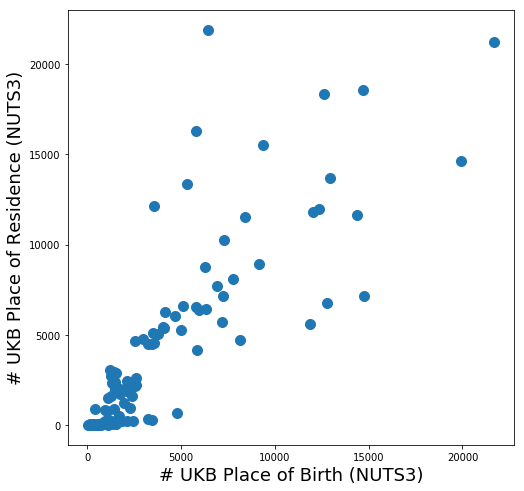

In [13]:
nuts = 3 # 1 or 3
if nuts == 3:
    df = NUTS3_counts
else:
    df = NUTS1_counts

fig = plt.figure(figsize = (8,8))
ax = plt.subplot(111)
x = df['POBcount']
y = df['PORcount']
ax.scatter(x,y,s=100)
ax.set_xlabel('# UKB Place of Birth (NUTS' + str(nuts) + ')',fontsize=18)
ax.set_ylabel('# UKB Place of Residence (NUTS' + str(nuts) + ')',fontsize=18)
plt.show()

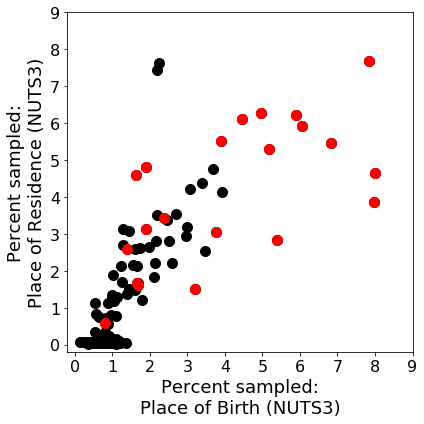

Total pop:  61371325
Number of POB samples:  441936
Number of POR samples:  441936
Total Percent Sampled:  0.7201017739147721
Total Percent Sampled, UKB age range:  1.6507987736001288


In [9]:
nuts = 3
df = NUTS3_counts

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
x = df['POBsampled_age']
y = df['PORsampled_age']
ax.scatter(x*100,y*100,s=100,color='k')

# plot nuts with AC
ac_nuts3 = pd.read_csv('../00_csv_files/assessment_center_coordinates_with_nuts3ID.csv')
nuts_with_ac = ac_nuts3.NUTS_ID.tolist()
df2 = NUTS3_counts[NUTS3_counts.nuts3.isin(nuts_with_ac)]
x = df2['POBsampled_age']
y = df2['PORsampled_age']
ax.scatter(x*100,y*100,s=100,color='r')

ax.set_xlabel('Percent sampled:\nPlace of Birth (NUTS' + str(nuts) + ')',fontsize=18)
ax.set_ylabel('Percent sampled:\nPlace of Residence (NUTS' + str(nuts) + ')',fontsize=18)

lims = [-0.2, 9]
ticks = range(10)
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.xticks(ticks,ticks,fontsize=16)
plt.yticks(ticks,ticks,fontsize=16)
plt.tight_layout()
plt.savefig('../07_figures/Figure_01_sampling_AC/scatter_percent_sampled.png', dpi=150)
plt.show()

# total population and proportion sampled
total_census_pop = np.sum(NUTS3_counts.census_pops.values)
total_census_pop_ukb_age = np.sum(NUTS3_counts.census_ukb_age)
total_sampled_POB = np.sum(NUTS3_counts.POBcount.values)
total_sampled_POR = np.sum(NUTS3_counts.PORcount.values)
print('Total pop: ', total_census_pop)
print('Number of POB samples: ', total_sampled_POB)
print('Number of POR samples: ', total_sampled_POR)
total_percent_sampled = total_sampled_POB / float(total_census_pop) * 100
print('Total Percent Sampled: ', total_percent_sampled)
print('Total Percent Sampled, UKB age range: ', float(total_sampled_POB) / total_census_pop_ukb_age * 100 )

In [25]:
print(len(NUTS3_counts[NUTS3_counts.POBsampled_age < 0.001]))
print(len(NUTS3_counts[NUTS3_counts.PORsampled_age < 0.001]))
NUTS3_counts.sort_values(by='PORsampled_age').head(10)

0
60


,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,POBsampled_age,PORsampled_age,POB_log2_sampled_ratio,POR_log2_sampled_ratio
21,UKE11,1109,28,256405,3584.605955,102035,0.004329,0.000109,"Kingston upon Hull, City of",71529480,0.010869,0.000274,-0.559668,-5.773397
60,UKH14,1217,99,728165,191.163743,340360,0.001673,0.000136,Suffolk,3809116671,0.003576,0.000291,-2.163596,-5.689393
7,UKD11,976,40,236110,113.643520,117740,0.004138,0.000169,West Cumbria,2077637157,0.008289,0.000340,-0.950515,-5.465364
67,UKH33,2455,232,1393585,400.035696,645870,0.001767,0.000166,Essex CC,3483651622,0.003801,0.000359,-2.075384,-5.384950
66,UKH32,405,23,157705,954.815894,63735,0.002581,0.000159,Thurrock,165167967,0.006354,0.000361,-1.334027,-5.378283
92,UKK21,739,51,331135,2869.955594,140875,0.002241,0.000154,Bournemouth and Poole,115379834,0.005246,0.000362,-1.610633,-5.373678
59,UKH13,1364,149,857890,159.017857,408560,0.001593,0.000174,Norfolk,5394928700,0.003339,0.000365,-2.262568,-5.363067
132,UKM65,80,4,21350,21.042257,10955,0.003747,0.000187,Orkney Islands,1014624989,0.007303,0.000365,-1.133381,-5.361349
110,UKL24,436,25,132975,25.599227,68275,0.003279,0.000188,Powys,5194492703,0.006386,0.000366,-1.326893,-5.357261
133,UKM66,45,4,23165,15.248715,10875,0.001943,0.000173,Shetland Islands,1519144400,0.004138,0.000368,-1.952882,-5.350775


# population density
1. Calculate NUTS3 population densities, given 2010 census data and areas.
2. for each POB-POR pair, calculate ratio of POR population density / POB population density
3. make a histogram

In [18]:
NUTS3_count = pd.read_csv('../00_csv_files/nuts3_POB_POR_counts.csv').sort_values(by='nuts3')
NUTS3_count.head(2)

,nuts3,POBcount,PORcount,census_pops,density,census_ukb_age,POB_sampled,POR_sampled,NUTS_NAME,area,POBsampled_age,PORsampled_age,POB_log2_sampled_ratio,POR_log2_sampled_ratio
0,UKC11,4673,6056,283640,943.785351,127180,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438,0.036743,0.047618,1.197614,1.665590
1,UKC12,6318,6459,273590,911.140520,121960,0.023100,0.023627,South Teesside,300272015,0.051804,0.052960,1.693196,1.818999


In [19]:
# add a column of population density to table
NUTS3_counts['density'] = NUTS3_counts['census_pops'] / NUTS3_counts['area'] * 1000 * 1000 # convert to km^2
NUTS3_counts.sort_values(by='density',ascending=False).head(10)

,nuts3,POBcount,PORcount,census_pops,POB_sampled,POR_sampled,NUTS_NAME,area,density,POB_log2_sampled_ratio,POR_log2_sampled_ratio
69,UKI12,9137,8934,2136655,0.004288,0.004192,Inner London - East,210865906,10132.766555,-0.686052,-0.637638
68,UKI11,11895,5595,1095245,0.010912,0.005403,Inner London - West,108209395,10121.533347,0.661603,-0.271282
81,UKJ31,925,40,205055,0.004526,0.000219,Portsmouth,40241825,5095.569100,-0.608089,-4.893152
61,UKH21,510,29,203200,0.002515,0.000143,Luton,42476293,4783.844956,-1.455780,-5.513914
82,UKJ32,746,45,236880,0.003170,0.000190,Southampton,50234170,4715.515355,-1.121547,-5.101298
38,UKF21,1544,42,329840,0.004684,0.000127,Leicester,71900369,4587.459071,-0.558435,-5.678444
72,UKI23,12354,11972,1959990,0.006313,0.006108,Outer London - West and North West,467284038,4194.429599,-0.127810,-0.094392
18,UKD72,14742,7153,466415,0.031633,0.015373,Liverpool,111870908,4169.225122,2.197145,1.237149
35,UKF14,8162,4728,305680,0.026704,0.015467,Nottingham,74108309,4124.773647,1.952802,1.245998
65,UKH31,395,37,173660,0.002280,0.000213,Southend-on-Sea,42597880,4076.728701,-1.596968,-4.935807


In [20]:
POB_average_sampled = np.mean(NUTS3_counts['POB_sampled'])
POR_average_sampled = np.mean(NUTS3_counts['POR_sampled'])
POB_log2_sampled_ratio = np.log2(NUTS3_counts['POB_sampled']/POB_average_sampled)
POR_log2_sampled_ratio = np.log2(NUTS3_counts['POR_sampled']/POR_average_sampled)

In [21]:
NUTS3_counts['POB_log2_sampled_ratio'] = POB_log2_sampled_ratio
NUTS3_counts['POR_log2_sampled_ratio'] = POR_log2_sampled_ratio
NUTS3_counts.sort_values(by='POB_log2_sampled_ratio').head(5)

,nuts3,POBcount,PORcount,census_pops,POB_sampled,POR_sampled,NUTS_NAME,area,density,POB_log2_sampled_ratio,POR_log2_sampled_ratio
74,UKJ12,144,59,248820,0.000579,0.000237,Milton Keynes,306643778,811.430128,-3.575237,-4.781454
46,UKG21,180,48,166640,0.001080,0.000288,Telford and Wrekin,290317215,573.992831,-2.674941,-4.500767
64,UKH25,379,73,254380,0.001490,0.000287,Central Bedfordshire,717799046,354.388880,-2.210991,-4.506155
59,UKH13,1364,149,857890,0.001593,0.000174,Norfolk,5394928700,159.017857,-2.114055,-5.230619
78,UKJ22,876,106,526670,0.001667,0.000201,East Sussex CC,1715541532,306.999271,-2.048882,-5.017973


In [22]:
# save table with density and ratios
NUTS3_counts.to_csv('../00_csv_files/nuts3_POB_POR_counts.csv',index=False)

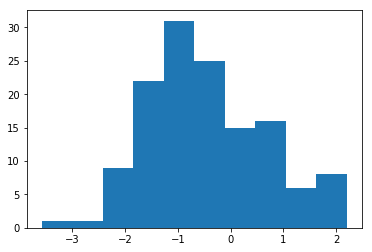

In [23]:
plt.hist(POB_log2_sampled_ratio)
plt.show()

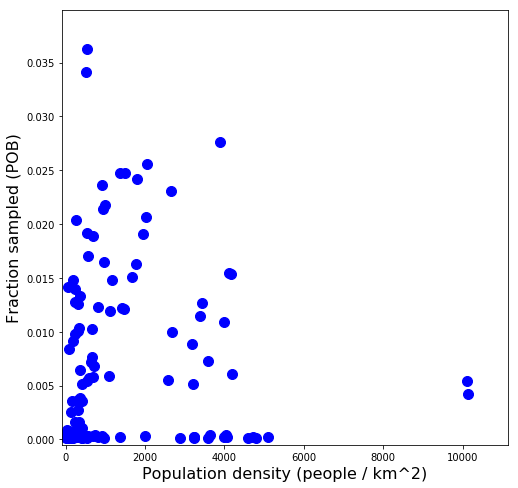

In [24]:
y = NUTS3_counts['POR_sampled']
x = NUTS3_counts['density']
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(x,y,s=100,c='b')
ax.set_ylabel('Fraction sampled (POB)',fontsize=16)
ax.set_xlabel('Population density (people / km^2)',fontsize=16)
ax.set_xlim([-100,1.1*max(x)])
ax.set_ylim([-0.0005,1.1*max(y)])
plt.show()

In [25]:
pob_por_migration = pd.read_csv('../00_csv_files/pob_por_migration.csv')
pob_por_migration.head(2)

,eid,POB_east,POB_north,POR_east,POR_north,distances,angles,POR_POB_popDensity
0,1136349,68500,801500,252000.0,663000.0,229901.065678,127.044351,389.270739
1,1071275,66500,798500,211000.0,665000.0,196729.509734,132.734083,0.798042


In [26]:
distanceThreshold = 20000
pob_por_above_threshold = pob_por_migration[pob_por_migration['distances']>=distanceThreshold]
print(len(pob_por_migration),len(pob_por_above_threshold))

441936 195248


In [19]:
eid_movers = eid_data[eid_data['eid'].isin(pob_por_above_threshold['eid'].values.tolist())]

In [20]:
# for each POB-POR pair, calculate population density ratio: POR/POBa
NUTS3_popDensity = dict(zip(NUTS3_counts['nuts3'],NUTS3_counts['density']))
POB_NUTS3 = eid_movers['POB_NUTSID'].values.tolist()
POR_NUTS3 = eid_movers['POR_NUTSID'].values.tolist()
log2ratios = np.zeros(len(eid_movers))

In [21]:
for i,pob in enumerate(POB_NUTS3):
    por_density = NUTS3_popDensity[POR_NUTS3[i]]
    pob_density = NUTS3_popDensity[pob]
    log2ratios[i] = np.log2(por_density/pob_density)

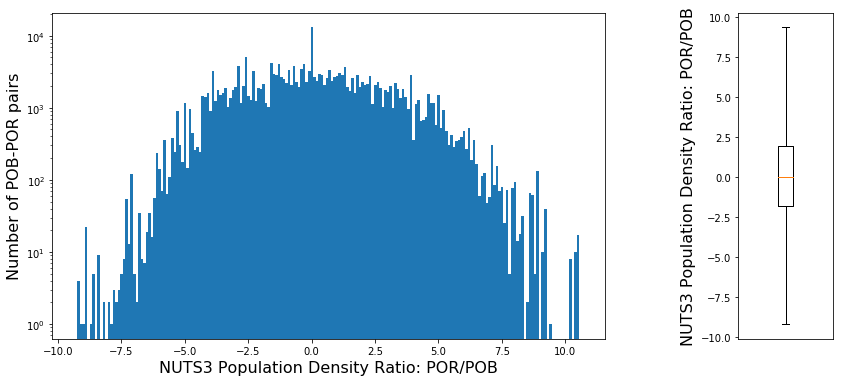

In [22]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize = (14,6))

gs = gridspec.GridSpec(ncols=7, nrows=1, figure=fig)

ax1 = fig.add_subplot(gs[0, :5])
binsize = 0.1
ax1.hist(log2ratios, bins = np.arange(min(log2ratios), max(log2ratios)+binsize, binsize))
ax1.set_xlabel('NUTS3 Population Density Ratio: POR/POB',fontsize = 16)
ax1.set_ylabel('Number of POB-POR pairs',fontsize = 16)
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[0, 6:])
ax2.boxplot(log2ratios,showfliers=False,whis=2)
ax2.set_ylabel('NUTS3 Population Density Ratio: POR/POB',fontsize = 16)
ax2.set_xticks([])

plt.show()


## (already done) add a column to pob_por_migration: POR_POB_popDensity  
## ratio of POR nuts3 Pop Density / POB nuts3 Pop Density

In [40]:
# takes forever . . . and ever # should rewrite to do dictionary for NUTS3=>density instead of calling the df
df = pob_por_migration
POR_POB_popDensity = np.zeros(len(df))
for i,r in df.iterrows():
    eid = r['eid']
    nutsPOB = eid_data[eid_data['eid']==eid]['POB_NUTSID'].values[0]
    nutsPOR = eid_data[eid_data['eid']==eid]['POR_NUTSID'].values[0]
    
    nutsPOB_density = NUTS3_counts[NUTS3_counts['nuts3']==nutsPOB]['density'].values[0]
    nutsPOR_density = NUTS3_counts[NUTS3_counts['nuts3']==nutsPOR]['density'].values[0]
    
    densityRatio = nutsPOR_density / nutsPOB_density
    
    POR_POB_popDensity[i] = densityRatio

In [41]:
pob_por_migration['POR_POB_popDensity'] = POR_POB_popDensity
pob_por_migration.head(3)

,eid,POB_east,POB_north,POR_east,POR_north,distances,angles,POR_POB_popDensity
0,1136349,68500,801500,252000.0,663000.0,229901.065678,127.044351,389.270739
1,1071275,66500,798500,211000.0,665000.0,196729.509734,132.734083,0.798042
2,4778319,66500,798500,323000.0,669000.0,287336.910264,116.787991,207.349386


In [42]:
pob_por_migration.to_csv('../00_csv_files/pob_por_migration.csv', index = False)

In [8]:
pob_por_migration = pd.read_csv('../00_csv_files/pob_por_migration.csv')
pob_por_migration.head(2)

,eid,POB_east,POB_north,POR_east,POR_north,distances,angles,POR_POB_popDensity
0,1136349,68500,801500,252000.0,663000.0,229901.065678,127.044351,389.270739
1,1071275,66500,798500,211000.0,665000.0,196729.509734,132.734083,0.798042


In [9]:
# save eid=>POR_POB_popDensity to csv for correlations
pob_por_migration[['eid','POR_POB_popDensity']].to_csv('../00_csv_files/d.csv',index=False)

# below is adding areas to NUTS3_counts ... already done.

In [13]:
# merge areas into NUTS3_counts and save new version of NUTS3_counts at
# '../00_csv_files/nuts3_POB_POR_counts.csv'
nuts3_with_areas = NUTS3_counts.merge(nuts3_areas[['NUTS_ID','area']],left_on='nuts3',right_on='NUTS_ID')
nuts3_with_areas.head(2)

,nuts3,POBcount,PORcount,census_pops,POB_sampled,POR_sampled,NUTS_NAME,NUTS_ID,area
0,UKC11,4673,6056,283640,0.016475,0.021351,Hartlepool and Stockton-on-Tees,UKC11,300534438
1,UKC12,6320,6464,273590,0.023100,0.023627,South Teesside,UKC12,300272015


In [14]:
nuts3_with_areas = nuts3_with_areas[['nuts3','POBcount','PORcount','census_pops','POB_sampled',
                                    'POR_sampled','NUTS_NAME','area']]
nuts3_with_areas.head(2)

,nuts3,POBcount,PORcount,census_pops,POB_sampled,POR_sampled,NUTS_NAME,area
0,UKC11,4673,6056,283640,0.016475,0.021351,Hartlepool and Stockton-on-Tees,300534438
1,UKC12,6320,6464,273590,0.023100,0.023627,South Teesside,300272015


In [15]:
nuts3_with_areas.to_csv('../00_csv_files/nuts3_POB_POR_counts.csv',index=False)

# histograms of sampling

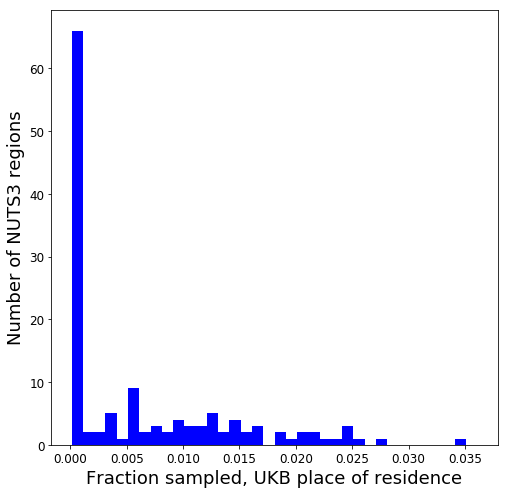

In [30]:
# Histogram: fraction sampled NUTS3 region POB
# Histogram: fraction sampled NUTS3 region POR
# Histogram: fraction sampled NUTS1 region POB
# Histogram: fraction sampled NUTS1 region POR
nuts = 3
poType = 'r'

if nuts == 3:
    df = NUTS3_counts
    s = 'NUTS3'
    binwidth = 0.001
else:
    df = NUTS1_counts
    s = 'NUTS1'
    binwidth = 0.0005
    
if poType == 'b':
    col = 'POB_sampled'
    pointType = 'birth'
    barColor = 'red'
else:
    col = 'POR_sampled'
    pointType = 'residence'
    barColor = 'blue'
    
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(111)
d = df[col]
ax.hist(d, bins = np.arange(min(d), max(d), binwidth), color = barColor)

ax.set_xlabel('Fraction sampled, UKB place of ' + pointType,fontsize=18)
ax.set_ylabel('Number of ' + s + ' regions',fontsize=18)
ax.tick_params(axis='both',labelsize=12)
plt.show()


# scatter census vs ukb

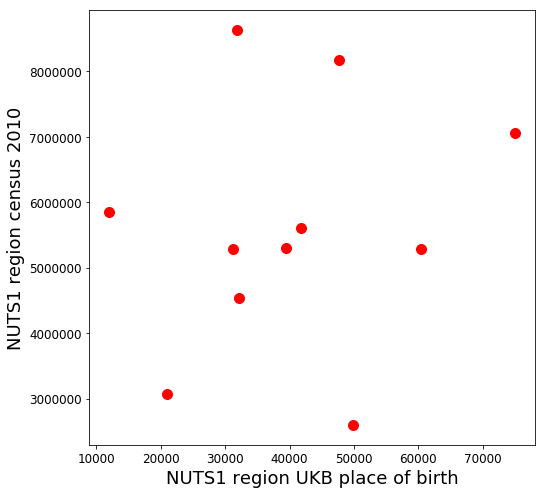

In [25]:
# Sampling: scatter of census vs. POB NUTS3
# Sampling: scatter of census vs. POR NUTS3
# Sampling: scatter of census vs. POB NUTS1
# Sampling: scatter of census vs. POR NUTS1
nuts = 1
poType = 'b'

if nuts == 3:
    df = NUTS3_counts
    s = 'NUTS3'
else:
    df = NUTS1_counts
    s = 'NUTS1'
    
if poType == 'b':
    col = 'POBcount'
    pointType = 'birth'
    pointColor = 'red'
else:
    col = 'PORcount'
    pointType = 'residence'
    pointColor = 'blue'

x = df[col]
y = df['census_pops']
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(111)
ax.scatter(x,y,100,pointColor)
ax.set_xlabel(s + ' region UKB place of ' + pointType,fontsize=18)
ax.set_ylabel(s + ' region census 2010',fontsize=18)
ax.tick_params(axis='both',labelsize=12)
plt.show()

# stuff down below is already done. 
# Mainly building the csv files.

In [19]:
# df.rename(index=str, columns={"A": "a", "C": "c"})
NUTS1_counts.rename(index=str, columns={"nuts3":"nuts1"}, inplace=True)

In [20]:
NUTS1_counts

,nuts1,POBcount,PORcount,census_pops
0,UKC,49833,52697,2596890
1,UKD,75001,70957,7052175
2,UKE,60365,65060,5283730
3,UKF,32146,37496,4533225
4,UKG,41773,36452,5601855
5,UKH,12022,1255,5846965
6,UKI,47652,43020,8173940
7,UKJ,31890,44042,8634750
8,UKK,31233,38479,5288935
9,UKL,20993,19781,3063455


In [21]:
NUTS1_names = ['North East England','North West England','Yorkshire and the Humber','East Midlands','West Midlands',
              'East of England','London','South East England','South West England','Wales','Scotland']

In [23]:
NUTS1_counts['NUTS_NAME'] = NUTS1_names

In [27]:
POB_sampled = NUTS1_counts['POBcount'].values / NUTS1_counts['census_pops']
POR_sampled = NUTS1_counts['PORcount'].values / NUTS1_counts['census_pops']
NUTS1_counts['POB_sampled'] = POB_sampled
NUTS1_counts['POR_sampled'] = POR_sampled
NUTS1_counts = NUTS1_counts[['nuts1','POBcount','PORcount','census_pops','POB_sampled','POR_sampled',
                           'NUTS_NAME']]
NUTS1_counts

,nuts1,POBcount,PORcount,census_pops,POB_sampled,POR_sampled,NUTS_NAME
0,UKC,49833,52697,2596890,0.019189,0.020292,North East England
1,UKD,75001,70957,7052175,0.010635,0.010062,North West England
2,UKE,60365,65060,5283730,0.011425,0.012313,Yorkshire and the Humber
3,UKF,32146,37496,4533225,0.007091,0.008271,East Midlands
4,UKG,41773,36452,5601855,0.007457,0.006507,West Midlands
5,UKH,12022,1255,5846965,0.002056,0.000215,East of England
6,UKI,47652,43020,8173940,0.005830,0.005263,London
7,UKJ,31890,44042,8634750,0.003693,0.005101,South East England
8,UKK,31233,38479,5288935,0.005905,0.007275,South West England
9,UKL,20993,19781,3063455,0.006853,0.006457,Wales


In [28]:
NUTS1_counts.to_csv('../00_csv_files/nuts1_POB_POR_counts.csv',index=False)

In [7]:
NUTS3_counts = NUTS3_counts[['nuts3','POBcount','PORcount','census_pops','POB_sampled','POR_sampled',
                            'NUTS_NAME']]

In [9]:
NUTS3_counts.to_csv('../00_csv_files/nuts3_POB_POR_counts.csv',index=False)

In [9]:
## Goal = Color and/or Size-coded NUTS3 centroids for POB, POR
# final product for qgis: csv of dataframe NUTS_ID POB_count POR_count CensusPopulation
# get list of mutsIDs
# go through rows of eid_data
# add counts for POB, POR
# make dataframe
NUTS3_list = sorted(list(set(eid_data['POB_NUTSID'].values.tolist())))
POB_nuts = eid_data['POB_NUTSID'].values.tolist()
POR_nuts = eid_data['POR_NUTSID'].values.tolist()

In [10]:
POB_counts = dict((x,POB_nuts.count(x)) for x in NUTS3_list)
POR_counts = dict((x,POR_nuts.count(x)) for x in NUTS3_list)

In [12]:
o = open('nuts3_POB_POR_counts.csv','w')
o.write('nuts3,POBcount,PORcount\n')
for n in NUTS3_list:
    o.write(n + ',' + str(POB_counts[n]) + ',' + str(POR_counts[n]) + '\n')
o.close()

In [15]:
NUTS_counts = pd.read_csv('nuts3_POB_POR_counts.csv')
NUTS_counts.head(2)

,nuts3,POBcount,PORcount
0,UKC11,4673,6056
1,UKC12,6320,6464


In [17]:
# add census data
nuts3_weights = pd.read_csv('../nuts/nuts3_sampling_corrections.csv')
nuts3_weights.sort_values(by='NUTS_ID').head(2)

,NUTS_ID,ukb_points,census_pops,frac_sampled,weighting
107,UKC11,4674,283640,0.016479,1.918452
72,UKC12,6321,273590,0.023104,1.368317


In [18]:
nuts3_counts_with_census = NUTS_counts.merge(nuts3_weights[['NUTS_ID','census_pops']], 
                                             left_on='nuts3', right_on='NUTS_ID')

In [19]:
nuts3_counts_with_census.head(2)

,nuts3,POBcount,PORcount,NUTS_ID,census_pops
0,UKC11,4673,6056,UKC11,283640
1,UKC12,6320,6464,UKC12,273590


In [20]:
# save new copy
nuts3_counts_with_census.to_csv('nuts3_POB_POR_counts.csv',index=False)

In [27]:
# make nuts1_POB_POR_counts from nuts3_POB_POR_counts
NUTS3_counts = pd.read_csv('nuts3_POB_POR_counts.csv')
nuts1_counts = {}
for i,r in NUTS3_counts.iterrows():
    NUTS1 = r['nuts3'][:-2]
    pob = r['POBcount']
    por = r['PORcount']
    census = r['census_pops']
    if NUTS1 in nuts1_counts.keys():
        nuts1_counts[NUTS1]['pob'] += pob
        nuts1_counts[NUTS1]['por'] += por
        nuts1_counts[NUTS1]['census'] += census
    else:
        nuts1_counts[NUTS1] = {}
        nuts1_counts[NUTS1]['pob'] = pob
        nuts1_counts[NUTS1]['por'] = por
        nuts1_counts[NUTS1]['census'] = census

In [35]:
o = open('nuts1_POB_POR_counts.csv','w')
o.write('nuts3,POBcount,PORcount,census_pops\n')
for n in sorted(nuts1_counts.keys()):
    o.write(n + ',' + str(nuts1_counts[n]['pob']) + ',' + str(nuts1_counts[n]['por']) 
            + ',' + str(nuts1_counts[n]['census']) + '\n')
o.close()

In [36]:
NUTS1_counts = pd.read_csv('../00_csv_files/nuts1_POB_POR_counts.csv')
NUTS1_counts

,nuts3,POBcount,PORcount,census_pops
0,UKC,49833,52697,2596890
1,UKD,75001,70957,7052175
2,UKE,60365,65060,5283730
3,UKF,32146,37496,4533225
4,UKG,41773,36452,5601855
5,UKH,12022,1255,5846965
6,UKI,47652,43020,8173940
7,UKJ,31890,44042,8634750
8,UKK,31233,38479,5288935
9,UKL,20993,19781,3063455


In [38]:
# tables of top 10 oversampled and top 10 undersampled nuts3 regions for POB, POR
POBcounts = NUTS3_counts['POBcount'].values
PORcounts = NUTS3_counts['PORcount'].values
census = NUTS3_counts['census_pops'].values
POB_sampled = POBcounts/census
POR_sampled = PORcounts/census
NUTS3_counts['POB_sampled'] = POB_sampled
NUTS3_counts['POR_sampled'] = POR_sampled
NUTS3_counts.head(5)

,nuts3,POBcount,PORcount,NUTS_ID,census_pops,POB_sampled,POR_sampled
0,UKC11,4673,6056,UKC11,283640,0.016475,0.021351
1,UKC12,6320,6464,UKC12,273590,0.023100,0.023627
2,UKC13,1476,2023,UKC13,105565,0.013982,0.019164
3,UKC14,7226,7167,UKC14,513240,0.014079,0.013964
4,UKC21,3441,4485,UKC21,316030,0.010888,0.014192


In [39]:
NUTS3_counts.to_csv('nuts3_POB_POR_counts.csv',index=False)

In [43]:
# add the nuts3 names to the counts
nuts3_names = pd.read_csv('../nuts/nuts3_2010_fixedGeometries.csv', delimiter = '\t')
nuts3_names.head(2)

,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME,FID,NUMPOINTS
0,3,UKC11,UK,Hartlepool and Stockton-on-Tees,UKC11,4648.0
1,3,UKC12,UK,South Teesside,UKC12,6315.0


In [45]:
nuts3_counts_with_names = NUTS3_counts.merge(nuts3_names[['NUTS_ID','NUTS_NAME']],left_on='nuts3',right_on='NUTS_ID')
nuts3_counts_with_names.head(2)

,nuts3,POBcount,PORcount,NUTS_ID_x,census_pops,POB_sampled,POR_sampled,NUTS_ID_y,NUTS_NAME
0,UKC11,4673,6056,UKC11,283640,0.016475,0.021351,UKC11,Hartlepool and Stockton-on-Tees
1,UKC12,6320,6464,UKC12,273590,0.023100,0.023627,UKC12,South Teesside


In [46]:
nuts3_counts_with_names.to_csv('nuts3_POB_POR_counts.csv',index=False)

In [47]:
NUTS3_counts = pd.read_csv('../00_csv_files/nuts3_POB_POR_counts.csv')

In [50]:
# look at top 10 and bottom 10 fraction sampled for POR and POB
POB_top10 = NUTS3_counts.sort_values(by='POB_sampled',ascending = False)[['nuts3','NUTS_NAME','POB_sampled']].head(10)
POB_top10.to_csv('top10_pob_nuts3.csv',index=False)
POB_top10

,nuts3,NUTS_NAME,POB_sampled
18,UKD72,Liverpool,0.031633
48,UKG23,Stoke-on-Trent,0.028770
87,UKK11,"Bristol, City of",0.028111
35,UKF14,Nottingham,0.026704
5,UKC22,Tyneside,0.026135
27,UKE32,Sheffield,0.023463
1,UKC12,South Teesside,0.023100
122,UKM34,Glasgow City,0.021590
29,UKE42,Leeds,0.019553
6,UKC23,Sunderland,0.018232


In [51]:
POB_bottom10 = NUTS3_counts.sort_values(by='POB_sampled')[['nuts3','NUTS_NAME','POB_sampled']].head(10)
POB_bottom10.to_csv('bottom10_pob_nuts3.csv',index=False)
POB_bottom10

,nuts3,NUTS_NAME,POB_sampled
74,UKJ12,Milton Keynes,0.000579
46,UKG21,Telford and Wrekin,0.001080
64,UKH25,Central Bedfordshire,0.001490
59,UKH13,Norfolk,0.001593
78,UKJ22,East Sussex CC,0.001667
60,UKH14,Suffolk,0.001673
90,UKK14,Swindon,0.001712
41,UKF25,North Northamptonshire,0.001720
67,UKH33,Essex CC,0.001767
80,UKJ24,West Sussex,0.001813


In [55]:
POR_top10 = NUTS3_counts.sort_values(by='POR_sampled',ascending = False)[['nuts3','NUTS_NAME','POR_sampled']].head(10)
POR_top10.to_csv('top10_por_nuts3.csv',index=False)
POR_top10

,nuts3,NUTS_NAME,POR_sampled
37,UKF16,South Nottinghamshire,0.036258
88,UKK12,"Bath and North East Somerset, North Somerset a...",0.034164
87,UKK11,"Bristol, City of",0.027616
5,UKC22,Tyneside,0.025611
27,UKE32,Sheffield,0.024730
29,UKE42,Leeds,0.024703
115,UKM25,"Edinburgh, City of",0.024206
1,UKC12,South Teesside,0.023627
48,UKG23,Stoke-on-Trent,0.023035
108,UKL22,Cardiff and Vale of Glamorgan,0.021754


In [54]:
POR_bottom10 = NUTS3_counts.sort_values(by='POR_sampled')[['nuts3','NUTS_NAME','POR_sampled']].head(10)
POR_bottom10.to_csv('bottom10_por_nuts3.csv',index=False)
POR_bottom10

,nuts3,NUTS_NAME,POR_sampled
21,UKE11,"Kingston upon Hull, City of",0.000109
38,UKF21,Leicester,0.000127
60,UKH14,Suffolk,0.000136
61,UKH21,Luton,0.000143
57,UKH11,Peterborough,0.000152
92,UKK21,Bournemouth and Poole,0.000154
52,UKG33,Coventry,0.000155
66,UKH32,Thurrock,0.000159
67,UKH33,Essex CC,0.000166
7,UKD11,West Cumbria,0.000169


In [31]:
ac = pd.read_csv('../00_csv_files/assessmentCentreCoordinates.csv')
ac

,Name,Count,East,North,Code
0,Barts,12582,531807,181602,11012
1,Birmingham,25501,406790,287314,11021
2,Bristol,43012,359469,172551,11011
3,Bury,28322,380313,410782,11008
4,Cardiff,17878,317841,176760,11003
5,Croydon,27381,531544,165489,11020
6,Edinburgh,17198,325764,673964,11005
7,Glasgow,18647,259106,665369,11004
8,Hounslow,28875,512863,175510,11018
9,Leeds,44199,429691,433831,11010
